# Analyzing our Mountain Project Climbing Route Data

## Data Pre-Processing

### Read in the Mountain Project csv into pandas dataframe

In [51]:
# Importing modules
import pandas as pd

file_path = "dataset/mp_routes.csv"

# Read data into papers
df = pd.read_csv(file_path)

# Print head
df.head()

,Unnamed: 0,Route,Location,URL,Avg Stars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude,desc,protection,num_votes
0,0,Access Denied,El Mirador > El Potrero Chico > Nuevo Leon > N...,https://www.mountainproject.com/route/11014983...,2.9,Sport,5.10b/c,4,350.0,25.95044,-100.47755,This is a really great route~ with awesome exp...,12 draws + 60m Rope Take 22 draws if you wan...,22
1,1,Agave Nectar,Sugar Shack > Cougar Canyon (Creek) - CONSTRUC...,https://www.mountainproject.com/route/11091386...,2.0,Sport,5.10b/c,1,NaN,51.09642,-115.31767,from tabvar: Cool fins to roof~ thin holds...,4 bolts to anchor,1
2,2,Ant & Bee do Yoga,The Hen House > Kamloops > British Columbia > ...,https://www.mountainproject.com/route/11240652...,2.7,Trad,5.10b/c,1,NaN,50.57212,-120.13874,A safe mixed route with a bit of run out up to...,"mixed~ gear to 4""",3
3,3,Besame Fuerte,Pilon De Lolita > Loreto Area > Baja Californi...,https://www.mountainproject.com/route/11608640...,2.0,Sport,5.10b/c,1,80.0,26.01097,-111.34166,Start on a slab under a left leaning arched ro...,bolts,1
4,4,Big Momma's Rock,The Courtyard > Mamquam FSR > Squamish > Briti...,https://www.mountainproject.com/route/11445772...,3.0,Sport,5.10b/c,1,60.0,49.71393,-123.09943,Fun technical climbing. Tricky right off the bat.,bolts,3


In [52]:
# Print the column names
print(df.columns)

# Print number of rows
print("Number of routes:", len(df))

Index(['Unnamed: 0', 'Route', 'Location', 'URL', 'Avg Stars', 'Route Type',
       'Rating', 'Pitches', 'Length', 'Area Latitude', 'Area Longitude',
       ' desc', ' protection', ' num_votes'],
      dtype='object')
Number of routes: 116700


In [53]:
# Remove the columns
df = df.drop(columns=['Unnamed: 0', 'URL', 'Route Type', 'Pitches', 'Length', 'Area Latitude', 'Area Longitude', ' protection', ' num_votes'], axis=1)

# Print out the first rows of papers
df.head()

,Route,Location,Avg Stars,Rating,desc
0,Access Denied,El Mirador > El Potrero Chico > Nuevo Leon > N...,2.9,5.10b/c,This is a really great route~ with awesome exp...
1,Agave Nectar,Sugar Shack > Cougar Canyon (Creek) - CONSTRUC...,2.0,5.10b/c,from tabvar: Cool fins to roof~ thin holds...
2,Ant & Bee do Yoga,The Hen House > Kamloops > British Columbia > ...,2.7,5.10b/c,A safe mixed route with a bit of run out up to...
3,Besame Fuerte,Pilon De Lolita > Loreto Area > Baja Californi...,2.0,5.10b/c,Start on a slab under a left leaning arched ro...
4,Big Momma's Rock,The Courtyard > Mamquam FSR > Squamish > Briti...,3.0,5.10b/c,Fun technical climbing. Tricky right off the bat.


In [54]:
print(df.columns)

Index(['Route', 'Location', 'Avg Stars', 'Rating', ' desc'], dtype='object')


### Remove any rows with 0 length descriptions or more than 2000 word descriptions

In [55]:
# Print the number of rows before removal
print("Number of rows before removal:", len(df))

# Remove rows with descriptions containing 0 words or more than 2000 words
df = df[(df[' desc'].str.split().str.len() > 0) & (df[' desc'].str.split().str.len() <= 2000)]

# Print the number of rows after removal
print("Number of rows after removal:", len(df))

Number of rows before removal: 116700
Number of rows after removal: 116430


In [56]:
df[' desc'].head()

0    This is a really great route~ with awesome exp...
1    from tabvar:     Cool fins to roof~ thin holds...
2    A safe mixed route with a bit of run out up to...
3    Start on a slab under a left leaning arched ro...
4    Fun technical climbing. Tricky right off the bat.
Name:  desc, dtype: object

### Remove any routes with non-English descriptions

In [60]:
from langdetect import detect

# Function to check if a text is in English using langdetect
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False
    
# Remove rows where the description is not in English
df = df[df[' desc'].apply(is_english)]

# Print the number of rows after removal of non-English
print("Number of rows after removal:", len(df))

Number of rows after removal: 112699


### Remove punctuation and lowercase all descriptions

In [62]:
import string

# Remove punctuation and convert to lowercase
def clean_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    return text.lower()

# Apply text cleaning to the description column
df[' desc'] = df[' desc'].apply(clean_text)

df.head()

,Route,Location,Avg Stars,Rating,desc
0,Access Denied,El Mirador > El Potrero Chico > Nuevo Leon > N...,2.9,5.10b/c,this is a really great route with awesome expo...
1,Agave Nectar,Sugar Shack > Cougar Canyon (Creek) - CONSTRUC...,2.0,5.10b/c,from tabvar cool fins to roof thin holds o...
2,Ant & Bee do Yoga,The Hen House > Kamloops > British Columbia > ...,2.7,5.10b/c,a safe mixed route with a bit of run out up to...
3,Besame Fuerte,Pilon De Lolita > Loreto Area > Baja Californi...,2.0,5.10b/c,start on a slab under a left leaning arched ro...
4,Big Momma's Rock,The Courtyard > Mamquam FSR > Squamish > Briti...,3.0,5.10b/c,fun technical climbing tricky right off the bat


###  Save cleaned data to csv

In [63]:
df.to_csv("mp_routes_clean.csv", encoding='utf-8', index=False)

### Read in cleaned data

In [7]:
# Importing modules
import pandas as pd

file_path = "mp_routes_clean.csv"

# Read data into papers
df = pd.read_csv(file_path)

# Print head
df.head()

,Route,Location,Avg Stars,Rating,desc
0,Access Denied,El Mirador > El Potrero Chico > Nuevo Leon > N...,2.9,5.10b/c,this is a really great route with awesome expo...
1,Agave Nectar,Sugar Shack > Cougar Canyon (Creek) - CONSTRUC...,2.0,5.10b/c,from tabvar cool fins to roof thin holds o...
2,Ant & Bee do Yoga,The Hen House > Kamloops > British Columbia > ...,2.7,5.10b/c,a safe mixed route with a bit of run out up to...
3,Besame Fuerte,Pilon De Lolita > Loreto Area > Baja Californi...,2.0,5.10b/c,start on a slab under a left leaning arched ro...
4,Big Momma's Rock,The Courtyard > Mamquam FSR > Squamish > Briti...,3.0,5.10b/c,fun technical climbing tricky right off the bat


After cleaning there are 112,699 climbing routes.

## Some Exploratory Analysis

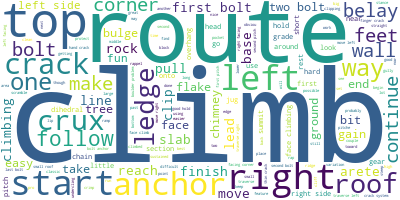

In [66]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df[' desc'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Topic Modeling

### Train Topic Model

In [8]:
import tomotopy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cfmci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Maybe we also want to add certain climbing terms that are not route style related to our stoplist?

In [32]:
more_stop_words = {"anchor", "bolt", "climb", "belay", "left", "right", "bolts", "climbed", "first", "ascent", "north", "east", "south", "west", "rap", "route", "pitch", "pro", "cam", "cams", "finish", "crux", "start", "classic", "quality", "excellent", "fun", "climbing"}

In [33]:
# 20-topic model populated with documents from our reviews (with stopwords removed)
stoplist = set(stopwords.words('english'))
stoplist.update(more_stop_words)

n_topics = 30
n_docs = len(df)

mdl = tomotopy.LDAModel(k=n_topics)
for desc in df[' desc']:
  words = desc.split()
  mdl.add_doc([w for w in words if w not in stoplist and w.isalpha()])

In [17]:
# Most converging will happen fast, but we'll run for 1000 iterations just in case
# (this will take a minute)
iters_per_check = 50
for i in range(0, 1000, iters_per_check):
    mdl.train(iters_per_check)
    print('Iteration: {}\tLog-likelihood: {}'.format(i+iters_per_check, mdl.ll_per_word))

Iteration: 50	Log-likelihood: -8.287460806247962
Iteration: 100	Log-likelihood: -8.151680766772138
Iteration: 150	Log-likelihood: -8.102983730079615
Iteration: 200	Log-likelihood: -8.076731080314795
Iteration: 250	Log-likelihood: -8.0602138699608
Iteration: 300	Log-likelihood: -8.051148197584409
Iteration: 350	Log-likelihood: -8.046434314557764
Iteration: 400	Log-likelihood: -8.038575536293902
Iteration: 450	Log-likelihood: -8.034342209133845
Iteration: 500	Log-likelihood: -8.032792376829779
Iteration: 550	Log-likelihood: -8.029986234644243
Iteration: 600	Log-likelihood: -8.025295175338057
Iteration: 650	Log-likelihood: -8.021873754710148
Iteration: 700	Log-likelihood: -8.01828000505799
Iteration: 750	Log-likelihood: -8.017422253326652
Iteration: 800	Log-likelihood: -8.014748881061086
Iteration: 850	Log-likelihood: -8.013514559467747
Iteration: 900	Log-likelihood: -8.00956516018953
Iteration: 950	Log-likelihood: -8.007632893907578
Iteration: 1000	Log-likelihood: -8.00748286395906


In [18]:
# Print top 25 words of each topic
print("Top 25 words by topic")
for k in range(n_topics):
    print('#{}: {}'.format(k, ' '.join([w for (w, prop) in mdl.get_topic_words(k, top_n=25)])))

Top 25 words by topic
#0: crack right climb left face top follow hand finger cracks start ledge thin system feet obvious traverse short wide horizontal finish continue anchor seam side
#1: pitch belay ledge left right corner climb crack continue traverse feet large chimney roof system small easy pitches tree move top climbing base rock another
#2: ridge summit class route north east rock south west gully side face notch snow climb easy scramble peak traverse follow descent steep trail pitches feet
#3: bolt first clip crux second moves third bolts move start clipping last stick climbing climb anchors make route high ground past right ledge easy getting
#4: route climbing one line routes rock best wall crux good great grade classic quality excellent climbs long well bit two many sustained difficult moves first
#5: bolt bolts anchor past climb right two left face slab gear ledge continue clip move small another follow bolted first flake climbing straight steep thin
#6: right black left sl

In [19]:
# Survey stats
# See https://bab2min.github.io/tomotopy/v0.4.1/en/#tomotopy.LDAModel.infer
mdl.summary()

<Basic Info>
| LDAModel (current version: 0.12.7)
| 112676 docs, 4081070 words
| Total Vocabs: 71381, Used Vocabs: 71381
| Entropy of words: 7.10545
| Entropy of term-weighted words: 7.10545
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 1000, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -8.00748
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 30 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 47183002 (random seed)
| trained in version 0.12.7
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  [0.193

## Cluster Topic Vectors

In [22]:
from collections import Counter

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

In [23]:
# Let's get the topic proportions for each document
doc_topic_props = np.zeros(shape=(n_docs, n_topics))
for i, doc in enumerate(mdl.docs):
    doc_topic_props[i, :] = doc.get_topic_dist()

In [24]:
# Now, let's try to get five clusters from KMeans
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
n_clusters = 5
kmm = KMeans(n_clusters=n_clusters)
cluster_labels = kmm.fit_predict(doc_topic_props)

c:\Users\cfmci\anaconda3\envs\Propaganda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
# Let's get some sample documents from each label:
n_sample_docs = 5
for k in range(n_clusters):
    print(f"Documents in cluster {k}:")
    cluster_doc_idxs = np.argwhere(cluster_labels == k).ravel()
    random_doc_idxs = np.random.choice(cluster_doc_idxs, size=n_sample_docs, replace=False)
    for didx in random_doc_idxs:
      print("Document {}: {}...".format(didx, df.loc[didx, ' desc']))

Documents in cluster 0:
Document 40015: first bolt is a little high  crux is pulling through roof from 3rd to 4th bolt  really fun climb takes some time to figur out the beta...
Document 37985: from a point above cirque lake and almost directly below the large tower on the ridge climb chimneys flakes and slab to the east ridge route ...
Document 105886: p1 10ab gear to 1 camalot 5 bolts this is the second of the right facing corners moving left to right it looks like the profile of old man withers fun mixed climbing two bolt anchor 30m  p28 gear to 1 camalot from the anchor head straight up over easy ground make the steep committing but well featured moves over the roof 58 paddle up the slab to the two bolt anchor on the left side of the midway ledge 25m  p3 8 gear to 3 camalot from the anchor head up and right up a thin seam then move up and right up the wider crack belay at the anchor at the base of the beautiful right facing corner this corner is the fourth pitch of tramp stamp gran

In [28]:
# We want to visualize our clusters, so we'll do dimensionality reduction with t-SNE
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# note - TSNE is slow!
tsne_docs = TSNE().fit_transform(doc_topic_props)

<Axes: >

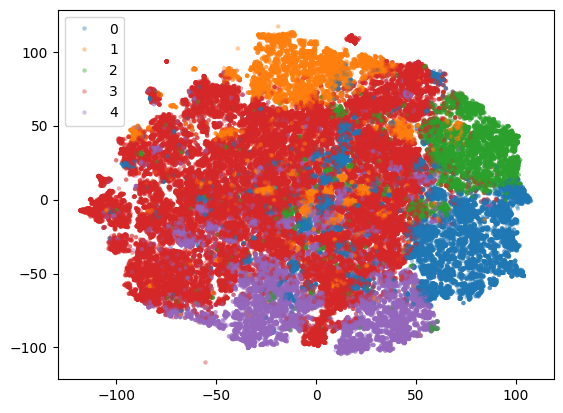

In [29]:
# Basic plotting approach: a scatterplot
sns.scatterplot(x=tsne_docs[:,0], y=tsne_docs[:,1], hue=[str(l) for l in cluster_labels], alpha=0.4, s=10, linewidth=0, hue_order=(str(i) for i in range(n_clusters)))

### Label Topics Related to Climbing Route Styles
Each route can get multiple labels. If no style can be reasonably associated with a route, label it as unknown.

## Classifier